<a href="https://colab.research.google.com/github/Parisa-Hatami/YapAiTekAssessment/blob/master/YapAiTekAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip install keras==2.1.0

     |████████████████████████████████| 307kB 4.9MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.0 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


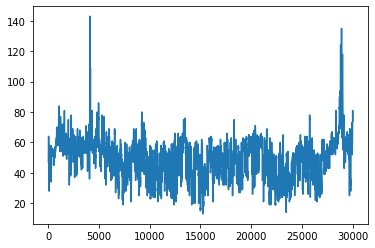

In [4]:
#plot dataset
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/drive/My Drive/psi_df_2016_2019.csv', usecols=['national'])
plt.plot(dataset)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# load the dataset
dataframe = pd.read_csv('/content/drive/My Drive/psi_df_2016_2019.csv', usecols=['national'])
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

21015 9007


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
21013/21013 [==============================] - 97s 5ms/step - loss: 9.6046e-04
Epoch 2/10
21013/21013 [==============================] - 96s 5ms/step - loss: 9.3098e-05
Epoch 3/10
21013/21013 [==============================] - 96s 5ms/step - loss: 9.2899e-05
Epoch 4/10
21013/21013 [==============================] - 97s 5ms/step - loss: 9.2983e-05
Epoch 5/10
21013/21013 [==============================] - 96s 5ms/step - loss: 9.2087e-05
Epoch 6/10
21013/21013 [==============================] - 95s 5ms/step - loss: 9.1863e-05
Epoch 7/10
21013/21013 [==============================] - 96s 5ms/step - loss: 9.2193e-05
Epoch 8/10
21013/21013 [==============================] - 96s 5ms/step - loss: 9.1828e-05
Epoch 9/10
21013/21013 [==============================] - 96s 5ms/step - loss: 9.1290e-05
Epoch 10/10
21013/21013 [==============================] - 95s 5ms/step - loss: 9.1062e-05


In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.23 RMSE
Test Score: 1.24 RMSE


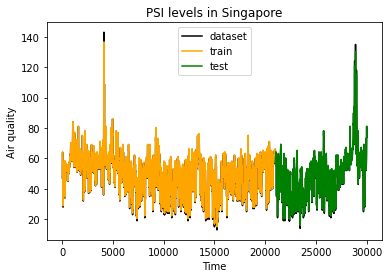

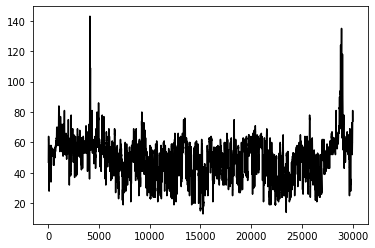

In [20]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), color = 'black', label = 'dataset')
plt.plot(trainPredictPlot, color = 'orange', label = 'train')
plt.plot(testPredictPlot, color = 'green', label = 'test')
plt.title('PSI levels in Singapore')
plt.xlabel('Time')
plt.ylabel('Air quality')
plt.legend()
plt.show()
plt.plot(scaler.inverse_transform(dataset), color = 'black')
plt.show()